# Import Python Libraries

Libraries are collections of Python functions, classes, data, and compiled code in a well-defined format.  Python comes with a library. Others are available for download and installation either manually or by way of Anaconda https://www.continuum.io/downloads or pip.
These notebooks can be run either from the cloud, or downloaded to your desktop.  To run from your desktop install anaconda and from the command prompt type 'jupyter notebook'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime

from collections import defaultdict
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics

%matplotlib inline

from pandas.tools.plotting import scatter_matrix

# Cool trick!  

If you want to know the inputs a function takes cursor inside the function parens and press
shift + tab.  This will pull up the docstring



In [3]:
#try it here.  Click inside the parenthesis and shift + tab.  This will come in handy
x = range(10)
np.mean(10)

10.0

# Read data into Pandas dataframe
"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."  You will find pandas dataframes to be similar to R dataframes.  Read about them here!

http://pandas.pydata.org/

In [68]:
from azureml import Workspace
ws = Workspace(
    workspace_id='42ee527dd34148f08273ad67b4654a49',
    authorization_token='',
    endpoint='https://studioapi.azureml.net'
)
experiment = ws.experiments['42ee527dd34148f08273ad67b4654a49.f-id.8012a2b15436439180e3fa1ec54e9307']
ds = experiment.get_intermediate_dataset(
    node_id='d572de49-2574-4225-82e4-eb638c102f31-18898',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)

In [69]:
mydata = ds.to_dataframe()

In [121]:
from azureml import Workspace
ws = Workspace(
    workspace_id='42ee527dd34148f08273ad67b4654a49',
    authorization_token='',
    endpoint='https://studioapi.azureml.net'
)
experiment = ws.experiments['42ee527dd34148f08273ad67b4654a49.f-id.8012a2b15436439180e3fa1ec54e9307']
ds = experiment.get_intermediate_dataset(
    node_id='d572de49-2574-4225-82e4-eb638c102f31-27631',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)

# What does my data look like?
Obtain the first several rows of a matrix or data frame using head, and use tail to obtain the last several rows. These functions may also be applied to obtain the first or last values in a vector.

mydata.head(n=6)  
mydata Ã¢ÂÂ A data frame.  
n Ã¢ÂÂ The first n rows (or values if x is a vector) will be returned.

mydata.tail(n=6)  
x Ã¢ÂÂ A matrix, data frame, or vector.  
n Ã¢ÂÂ The last n rows (or values if x is a vector) will be returned.

In [70]:
mydata.head(6)

,id,Cycle,setting1,setting2,setting3,Well_Head_Temperature,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Well_Head_Line_Pressure,...,Volume_Efficiency,Fuel_Air_Ratio,Bleed_Enthalpy,Demanded_Fan_Speed,Demanded_Corrected_Fan_Speed,Coolant_Bleed,Lubricant_Bleed,RUL,label1,label2
0,AA,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100,39.06,23.4190,191,0,0
1,AA,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100,39.00,23.4236,190,0,0
2,AA,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100,38.95,23.3442,189,0,0
3,AA,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100,38.88,23.3739,188,0,0
4,AA,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100,38.90,23.4044,187,0,0
5,AA,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,...,8.4108,0.03,391,2388,100,38.98,23.3669,186,0,0


# What are the variables/columns in my data?

Columns are a class variable


In [71]:
mydata.columns

Index([u'id', u'Cycle', u'setting1', u'setting2', u'setting3',
       u'Well_Head_Temperature', u'Compressor_Temperature_Stage_2',
       u'Compressor_Temperature_Stage_3', u'Compressor_Temperature_Stage_1',
       u'Well_Head_Line_Pressure', u'Diffrential_Pressure_Stage_3',
       u'Diffrential_Pressure_Stage_2', u'Physical_Fan_Speed',
       u'Physical_Core_Speed', u'Engine_Pressure_Ratio',
       u'Diffrential_Pressure_Stage_1', u'Compressor_Efficiency',
       u'Corrected_Fan_Speed', u'Corrected_Core_Speed', u'Volume_Efficiency',
       u'Fuel_Air_Ratio', u'Bleed_Enthalpy', u'Demanded_Fan_Speed',
       u'Demanded_Corrected_Fan_Speed', u'Coolant_Bleed', u'Lubricant_Bleed',
       u'RUL', u'label1', u'label2'],
      dtype='object')

# What are the dimensions of my data?

Use the shape method to obtain the dimensions of the data frame (number of rows and number of columns).


In [72]:
mydata.shape

(20631, 29)

# What types of data do I have?
While doing programming in any programming language, you need to use various variables to store various information. Variables are nothing but reserved memory locations to store values. This means that, when you create a variable you reserve some space in memory.

You may like to store information of various data types like character, wide character, integer, floating point, double floating point, Boolean etc. Based on the data type of a variable, the operating system allocates memory and decides what can be stored in the reserved memory.

Read more at: https://docs.python.org/2/library/datatypes.html

In [73]:
mydata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 29 columns):
id                                20631 non-null object
Cycle                             20631 non-null int64
setting1                          20631 non-null float64
setting2                          20631 non-null float64
setting3                          20631 non-null int64
Well_Head_Temperature             20631 non-null float64
Compressor_Temperature_Stage_2    20631 non-null float64
Compressor_Temperature_Stage_3    20631 non-null float64
Compressor_Temperature_Stage_1    20631 non-null float64
Well_Head_Line_Pressure           20631 non-null float64
Diffrential_Pressure_Stage_3      20631 non-null float64
Diffrential_Pressure_Stage_2      20631 non-null float64
Physical_Fan_Speed                20631 non-null float64
Physical_Core_Speed               20631 non-null float64
Engine_Pressure_Ratio             20631 non-null float64
Diffrential_Pressure_Stage_1      20631 n

#  What did we learn?

Do we have to worry about missing values?
What is an 'object' as opposed to a float64?

In [74]:
mydata.id[0].__class__

unicode

# Describe the data
Pandas provides convenient methods getting mins, maxes, counts, means, stds, and quantiles
What can we say about well head temperatures, what about RUL (Remaining useful life)?

In [75]:
mydata.describe()

,Cycle,setting1,setting2,setting3,Well_Head_Temperature,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Well_Head_Line_Pressure,Diffrential_Pressure_Stage_3,...,Volume_Efficiency,Fuel_Air_Ratio,Bleed_Enthalpy,Demanded_Fan_Speed,Demanded_Corrected_Fan_Speed,Coolant_Bleed,Lubricant_Bleed,RUL,label1,label2
count,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.150259,0.227813
std,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,...,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.357334,0.575358
min,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000,0.000000
25%,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000,0.000000
50%,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000,0.000000
75%,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000,0.000000
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000,2.000000


# How many unique values do we have?  Why do we care?  

Categorical Variables (Nominal Data): Some variables may be better treated as categorical if they don't have numeric properties.  For example, if we were seeing menu items, item 10 is not twice as great as item 5.  If were to treat menu items as numeric variables in a predictive model we could get strange results.  it's a judgement call.  Columns with fewer unique values might be treated as categorical variables and the unique values then become levels.  

Ordinal Data: Columns with fewer unique numeric values may be part of a numeric sequence and we may treat them as ordinals e.g. 1st, 2nd, 3rd...  If this is the case we may choose to reshape our data so that 1st, 2nd, 3rd become their own columns!  Each sample would then have its own set of ordinal positions.  However leaving ordinal data as a numeric has more predictive since we retain more information 

A classic example are binary values.  If we see two unique values in a columns it very well could be a true/false or yes/no variable.

If we see a variable with one unique value and our dataset will never grow, we can disregard it completely since it doesn't differentiate samples

Let's build a function to count the number of unique values!

In [76]:
'''
Input: a series or vector
Output: integer of unique values
'''

def unique_count(series):
    return len(series.unique())

In [77]:
'''
Try it out!
'''

unique_count(mydata.id)

100

In [78]:
'''
The .apply method is useful when we want to do the same operation on every column in a data frame
Let's use our new function with .apply
'''

mydata.apply(unique_count)

id                                 100
Cycle                              362
setting1                           158
setting2                            13
setting3                             1
Well_Head_Temperature                1
Compressor_Temperature_Stage_2     310
Compressor_Temperature_Stage_3    3012
Compressor_Temperature_Stage_1    4051
Well_Head_Line_Pressure              1
Diffrential_Pressure_Stage_3         2
Diffrential_Pressure_Stage_2       513
Physical_Fan_Speed                  53
Physical_Core_Speed               6403
Engine_Pressure_Ratio                1
Diffrential_Pressure_Stage_1       159
Compressor_Efficiency              427
Corrected_Fan_Speed                 56
Corrected_Core_Speed              6078
Volume_Efficiency                 1918
Fuel_Air_Ratio                       1
Bleed_Enthalpy                      13
Demanded_Fan_Speed                   1
Demanded_Corrected_Fan_Speed         1
Coolant_Bleed                      120
Lubricant_Bleed          

#  What did we just learn?

Can we throw any columns away?
Do we have any binaries?
Any potential categorical Variables?
Let's remove columns with only 1 unique value using a logical test

In [79]:
cols = mydata.columns[mydata.apply(unique_count) > 1]

In [80]:
mydata.shape

(20631, 29)

In [81]:
mydata = mydata[cols]

In [82]:
mydata.shape

(20631, 22)

#  What just happened?

# Visualize data trends and relationships by creating plots
## Histograms
A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.

In [83]:
#  Add a density estimator using seaborn

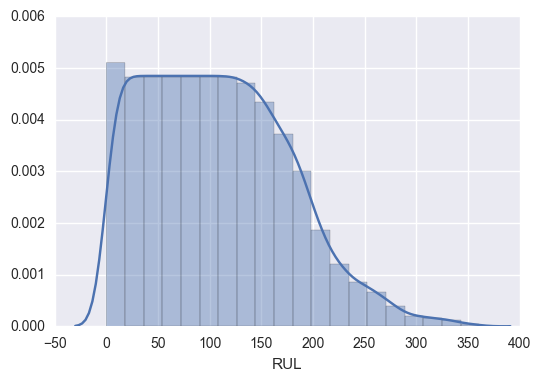

In [84]:
#x = np.random.normal(size=100)
x = mydata.RUL
fig = sns.distplot(x, hist = True, bins = 20);

# What kind of a process is this?
https://en.wikipedia.org/wiki/Negative_binomial_distribution#Definition

This may be important if we use a parametric model like linear or Poisson Regression to try to predict remaining useul life

https://en.wikipedia.org/wiki/Poisson_distribution  
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/360px-Poisson_pmf.svg.png", align = 'left'>

# How about looking at the kernel densities for all variables side by side.

We'll Center (shift the mean to zero) and scale (shrink the data to unit variance)
Then we'll make a violin and box plots.  

Box plots are nice because we can see outliers.

Violin plot are nice because we can see the shape of the distribution

https://en.wikipedia.org/wiki/Box_plot  
https://en.wikipedia.org/wiki/Violin_plot

In [85]:
# taking a random sample, because we don't need all of the data for an estimate
idx = np.random.choice(mydata.index, size = 200, replace = False)
df_samp = mydata.loc[idx]
df_samp.drop('id', axis = 1, inplace = True)

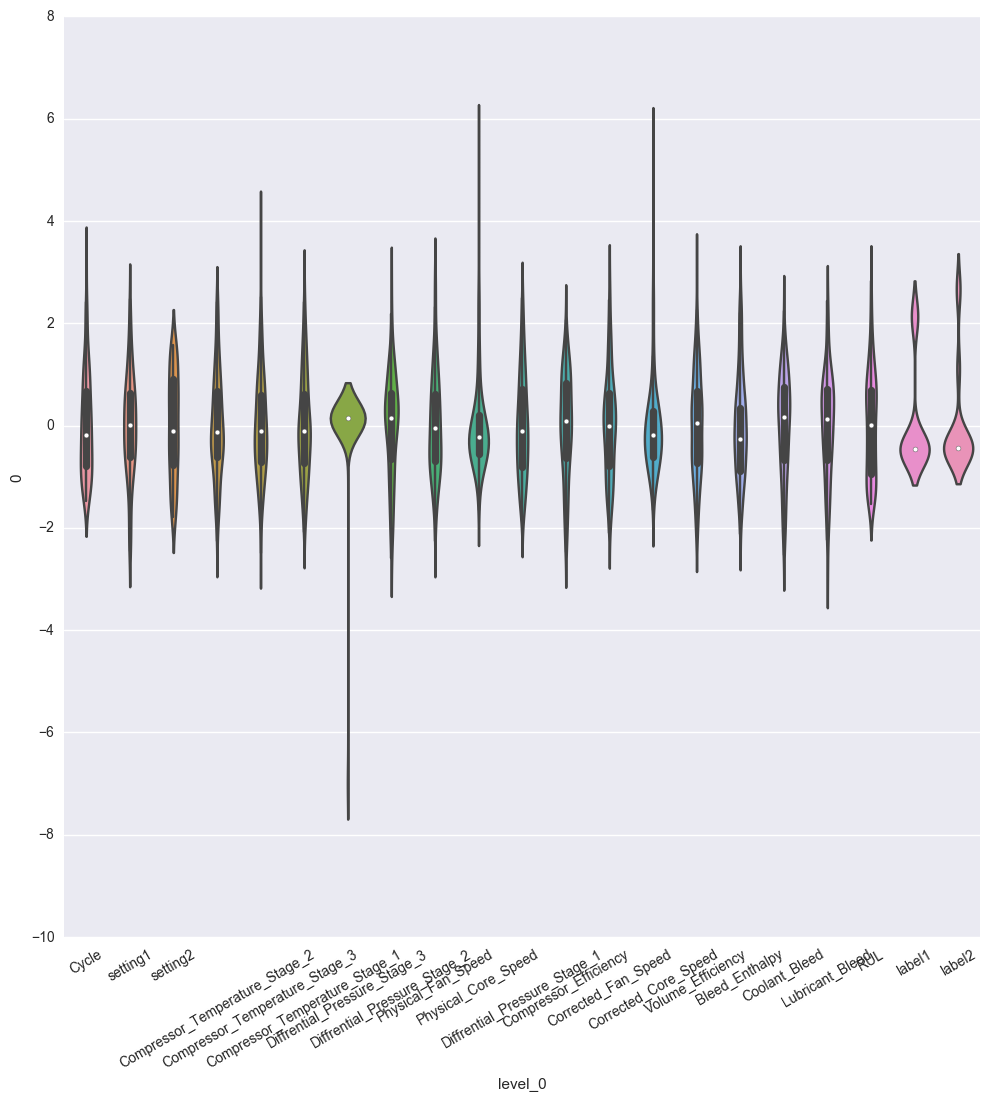

In [86]:
#Which variables share mutual information?

from sklearn.preprocessing import StandardScaler
Scale = StandardScaler(with_std=True, with_mean=True)
df_norm = pd.DataFrame(Scale.fit_transform(df_samp))
df_norm.columns=df_samp.columns

df_stack = df_norm.unstack().reset_index()

fg = sns.factorplot(x='level_0', y=0, 
                        data=df_stack, 
                        kind='violin',orient='vertical',
                       size = 10)
fg.set_xticklabels(rotation=30)

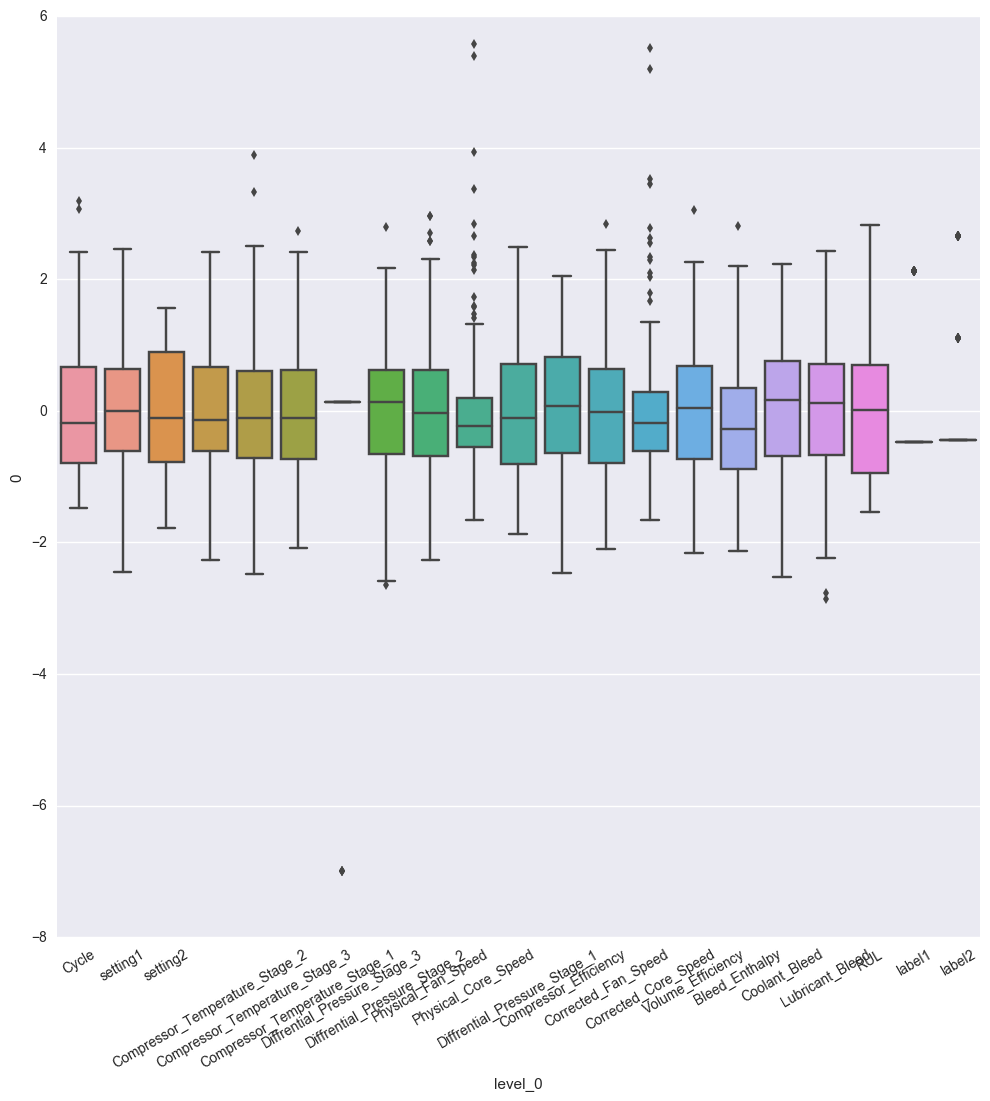

In [87]:
'''
Box plots accomplish a similar thing.  Depends on your style
'''
fg = sns.factorplot(x='level_0', y=0, 
                        data=df_stack, 
                        kind='box',orient='vertical',
                       size = 10)
fg.set_xticklabels(rotation=30)

# Why do we care about these distributions?

Outliers?
Distributions that are not "Normal"
Can inform us about a modeling strategy e.g. if your target variable has a Poisson-like distributions we might not choose a linear regression that assumes a normal distribution.
(Only a concern for parametric learners.  Not an issue for tree-based learners)

# Question:  Why would we choose not to use a parametric learner or a non-parametric learner?

#  We can see if there is a trend between two variables
Create a scatter plot and add a trendline

In [88]:
x = mydata.Compressor_Temperature_Stage_2 
y = mydata.Diffrential_Pressure_Stage_2


In [89]:
'''
Just a quirk.  We have to reshape the data so sklearn will like it
'''
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [90]:
from sklearn.linear_model import LinearRegression

#  Linear Regression in sklearn

Sci-kit learn a popular machine learning library.  We can use it to build models many different kinds of models.  Let's use it to fit the same line like we did in the plot above.  Then we can ask further questions about how good this fit is.

http://scikit-learn.org/stable/

'''
Next we initialize a linear regression model, and then train our model
'''

In [91]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
y_pred = lr.predict(x)

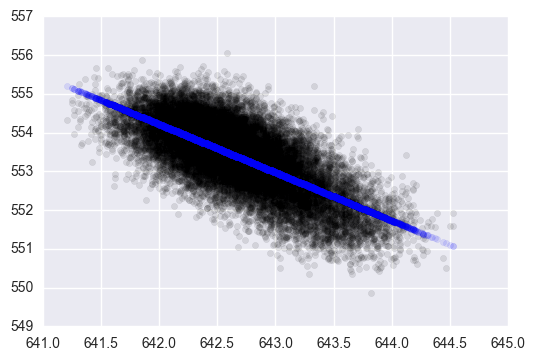

In [93]:
plt.scatter(x, y, alpha = .1, color = 'black')
plt.scatter(x, y_pred, alpha = .1, color = 'blue')

# Residual Plot
Residuals should be uniformally scattered if we have faith in our linear model
https://en.wikipedia.org/wiki/Heteroscedasticity

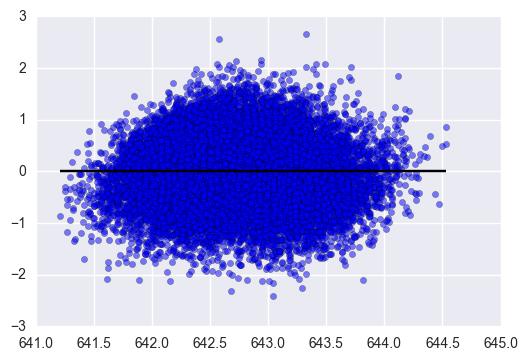

In [94]:
plt.scatter(x, y-y_pred, alpha = .5)
plt.hlines(0, xmin = min(x), xmax = max(x))

Coefficient of Determination measures how good the fit is.  It is 1 minus the ratio of sum of squaures of residuals to total sum of squares.  R2 is between 0 A perfect fit would be one, while a model that did no better than predicting the mean would give a value of 0
https://en.wikipedia.org/wiki/Coefficient_of_determination

# linear regression in statsmodels

while sklearn is an awesome machine learning library, statsmodels is has more statistical functionality.  let's build a model using stastmodels  
http://statsmodels.sourceforge.net/devel/index.html#

In [95]:
import statsmodels.formula.api as smf

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Compressor_Temperature_Stage_2 ~ Diffrential_Pressure_Stage_2', data=mydata).fit()

# Inspect the results
print results.summary()

                                  OLS Regression Results                                  
Dep. Variable:     Compressor_Temperature_Stage_2   R-squared:                       0.493
Model:                                        OLS   Adj. R-squared:                  0.493
Method:                             Least Squares   F-statistic:                 2.006e+04
Date:                            Fri, 10 Feb 2017   Prob (F-statistic):               0.00
Time:                                    11:58:48   Log-Likelihood:                -7968.8
No. Observations:                           20631   AIC:                         1.594e+04
Df Residuals:                               20629   BIC:                         1.596e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf.

Advanced Topic.  Multivariate Regression with Regularization

http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html

## What other variables are correlated?
### Correlation Plots 

Statisticians gather data to determine correlations (relationships) between variables. Scatter plots will often show at a glance whether a relationship exists between two sets of data.

If the slope of the line is positive, there is a positive correlation between the two sets of data.

If the slope of the line had been negative (falling from left to right), a negative correlation would exist since the slope of the line would have been negative.  Under a negative correlation, the longer I study, the worse grade I would get on my Regents examination.  YEEK!!

If the plot on the graph is scattered (it does not appear to rise or fall), there is no correlation between the sets of data.

There's lots of data so let's just take a random sample

In [96]:
df_samp.shape

(200, 21)

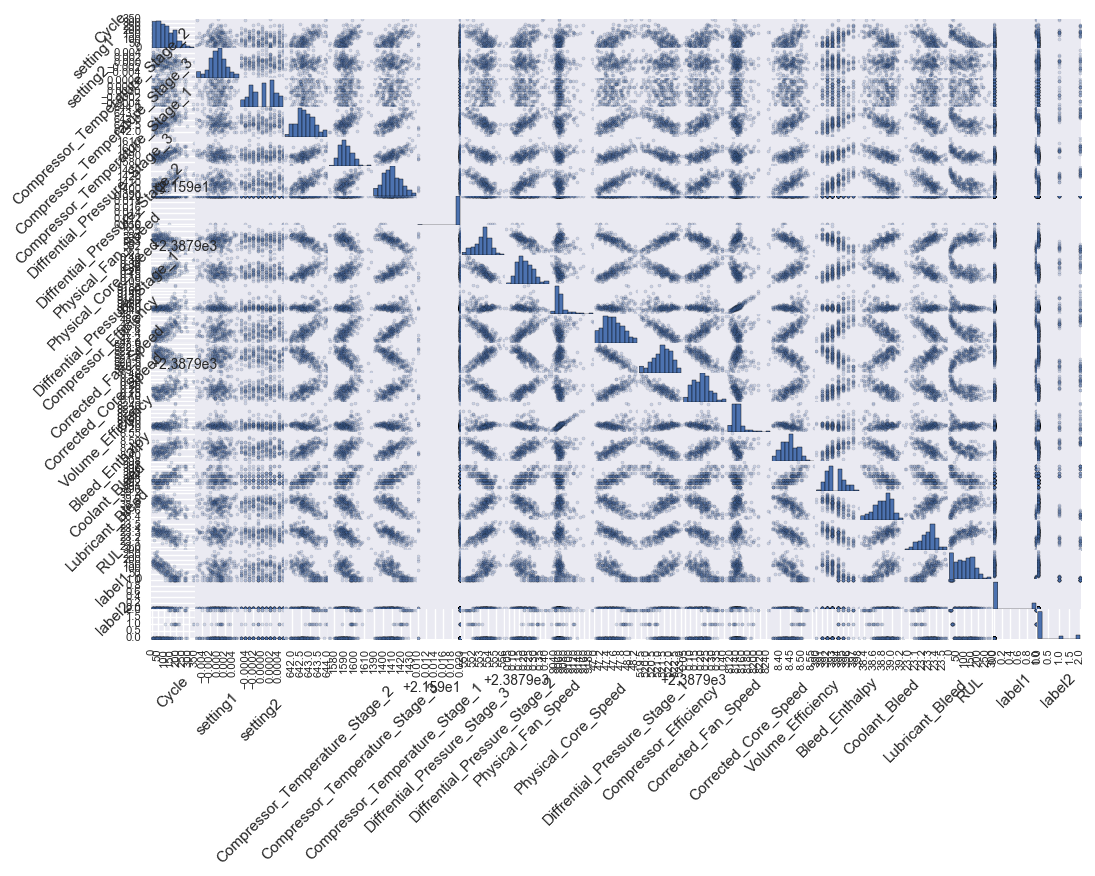

In [97]:
#plt.figure(figsize=(6,6))
sm = scatter_matrix(df_samp, alpha=0.2, figsize=(12,8), grid = True)
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]
plt.show()

### Correlation Coefficients
A correlation coefficient is a number that quantifies some type of correlation and dependence, meaning statistical relationships between two or more random variables or observed data value.

https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices

In [98]:

R = np.corrcoef(df_samp.T)

In [99]:
R = pd.DataFrame(R)
R.columns = df_samp.columns
R.index = df_samp.columns

In [100]:
R

,Cycle,setting1,setting2,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Diffrential_Pressure_Stage_3,Diffrential_Pressure_Stage_2,Physical_Fan_Speed,Physical_Core_Speed,...,Compressor_Efficiency,Corrected_Fan_Speed,Corrected_Core_Speed,Volume_Efficiency,Bleed_Enthalpy,Coolant_Bleed,Lubricant_Bleed,RUL,label1,label2
Cycle,1.000000,-0.118172,-0.056410,0.627698,0.620305,0.619035,0.097649,-0.617633,0.529393,0.409060,...,-0.634258,0.526412,0.314293,0.574675,0.622202,-0.599353,-0.649620,-0.758898,0.565799,0.532406
setting1,-0.118172,1.000000,0.045281,-0.067561,-0.168034,-0.023883,0.022912,0.013146,-0.020674,-0.009697,...,0.024092,-0.017247,-0.017589,-0.028252,0.004863,0.027917,-0.004220,0.053830,0.002631,-0.000444
setting2,-0.056410,0.045281,1.000000,0.007258,0.029920,0.030187,-0.080640,0.009838,0.013877,-0.087861,...,-0.081723,0.046688,-0.086808,0.051171,-0.048982,0.025567,0.027053,0.028737,0.023963,0.033326
Compressor_Temperature_Stage_2,0.627698,-0.067561,0.007258,1.000000,0.608937,0.728873,0.181283,-0.748433,0.730941,0.232826,...,-0.764928,0.723539,0.118403,0.687629,0.651643,-0.691208,-0.680657,-0.644509,0.631427,0.623334
Compressor_Temperature_Stage_3,0.620305,-0.168034,0.029920,0.608937,1.000000,0.678762,0.112116,-0.661093,0.608048,0.324934,...,-0.693752,0.621083,0.226992,0.620661,0.591007,-0.665728,-0.652953,-0.633426,0.620582,0.628589
Compressor_Temperature_Stage_1,0.619035,-0.023883,0.030187,0.728873,0.678762,1.000000,0.152103,-0.821798,0.770479,0.336596,...,-0.832496,0.732356,0.218316,0.768552,0.733453,-0.770603,-0.762540,-0.687604,0.676180,0.688199
Diffrential_Pressure_Stage_3,0.097649,0.022912,-0.080640,0.181283,0.112116,0.152103,1.000000,-0.148692,0.141046,0.044133,...,-0.152381,0.173919,-0.015012,0.107195,0.127178,-0.178937,-0.154835,-0.164354,0.066932,0.063294
Diffrential_Pressure_Stage_2,-0.617633,0.013146,0.009838,-0.748433,-0.661093,-0.821798,-0.148692,1.000000,-0.803899,-0.231042,...,0.861300,-0.801523,-0.108420,-0.786538,-0.714879,0.771385,0.785150,0.666887,-0.716962,-0.712384
Physical_Fan_Speed,0.529393,-0.020674,0.013877,0.730941,0.608048,0.770479,0.141046,-0.803899,1.000000,-0.054321,...,-0.839088,0.839094,-0.192692,0.769503,0.664610,-0.730510,-0.691255,-0.584841,0.613746,0.600312
Physical_Core_Speed,0.409060,-0.009697,-0.087861,0.232826,0.324934,0.336596,0.044133,-0.231042,-0.054321,1.000000,...,-0.177390,-0.021579,0.963602,0.228624,0.307479,-0.248799,-0.324270,-0.382317,0.378618,0.403707


In [101]:
## Note this is a symmetric matrix where all values along the diagonal are unity

In [102]:
# Generate a mask for the upper triangle
mask = np.zeros_like(R, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

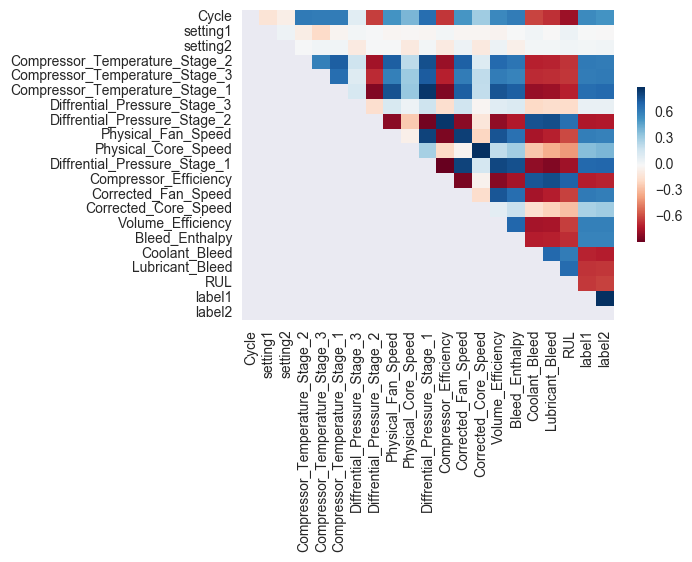

In [103]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R,  cmap='RdBu', mask = mask, vmax=.3,
            square=False,  cbar_kws={"shrink": .5})

Which variables are correlated?

# Mutual information.  

Ratio of joint probability assuming dependence to joint probabitlity assuming independence.  Used by decision trees to determine where to make a split.  Variable with most mutual information with the target is used to make the first split (greedy)

https://en.wikipedia.org/wiki/Mutual_information

In [104]:
from sklearn import metrics

In [105]:
def bin_me(series, threshold = 50):
    return 1*(series.values>np.percentile(series,threshold))

In [106]:
def MI(df_samp, thresh = 50):
    df_binned = df_samp.apply(bin_me, threshold = thresh)
    mi = [[metrics.mutual_info_score(df_binned[col2], df_binned[col], contingency=None) 
                     for col in df_binned.columns] for col2 in df_binned.columns]
    mi = pd.DataFrame(mi)
    mi.columns = df_samp.columns
    mi.index = df_samp.columns
    return mi

In [107]:
#Trying playing with different thresholds

In [108]:
mi = MI(df_samp, thresh = 10)

In [109]:
# Generate a mask for the upper triangle
mask = np.zeros_like(R, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

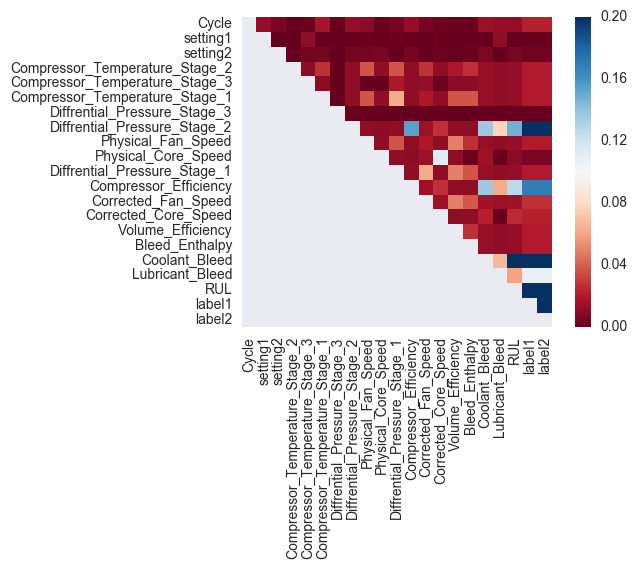

In [110]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mi,  cmap='RdBu', mask = mask, vmin = 0, vmax = .2,
            square=True)

#  What do the heatmap plots tell us?

What variables are similar?   
What variables are related to RUL, label1, and label2?

# Why do we care about correlation and mutual information?

If we are using a parametric model e.g. OLS, we assume our columns are linearly independent and if they aren't or if they are highly correlated our solution may not converge.

If we are using a non-parametric model, like trees, this isn't a problem

We may want to "understand" what is driving our model.  It's not always enough to just make a prediction.

We can reduce the dimensionality of by removing redundancy

This can reduce training time, and make the model more general (regularized).  Any drawbacks?

# Feature engineering
We can create new variables like rolling means, maxes, mins, stds or days of week that may be important but not something a model could ever infer.   Feature engineering is as much an art as a science.  Use your intuition and hyptothesis testing to see if your features do anything useful, or just throw them into the model and see what sticks. For failure models max and min values can be important

In [111]:
mydata.head()

,id,Cycle,setting1,setting2,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Diffrential_Pressure_Stage_3,Diffrential_Pressure_Stage_2,Physical_Fan_Speed,...,Compressor_Efficiency,Corrected_Fan_Speed,Corrected_Core_Speed,Volume_Efficiency,Bleed_Enthalpy,Coolant_Bleed,Lubricant_Bleed,RUL,label1,label2
0,AA,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,0,0
1,AA,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0,0
2,AA,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0,0
3,AA,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,0,0
4,AA,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,0,0


# We can take all sorts of aggregates after we have grouped the data.  Group by 'id'

In [112]:
grp = mydata.groupby('id')

In [113]:
grp_means = grp.mean()
grp_max = grp.max()
grp_min = grp.min()
grp_delta = grp_max-grp_min

In [114]:
grp_delta.head()

,Cycle,setting1,setting2,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Diffrential_Pressure_Stage_3,Diffrential_Pressure_Stage_2,Physical_Fan_Speed,Physical_Core_Speed,...,Compressor_Efficiency,Corrected_Fan_Speed,Corrected_Core_Speed,Volume_Efficiency,Bleed_Enthalpy,Coolant_Bleed,Lubricant_Bleed,RUL,label1,label2
id,,,,,,,,,,,,,,,,,,,,,
AA,191,0.0114,0.0009,2.50,27.84,38.94,0.00,4.26,0.32,27.99,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
AB,286,0.0144,0.0010,2.67,34.72,44.01,0.01,4.60,0.30,64.74,...,3.78,0.34,45.89,0.1949,9,1.01,0.6284,286,1,2
AC,178,0.0122,0.0010,2.45,29.28,48.65,0.01,3.97,0.25,150.44,...,3.65,0.25,124.92,0.1681,9,0.86,0.5619,178,1,2
AD,188,0.0106,0.0010,2.72,35.47,39.35,0.01,3.15,0.17,157.89,...,2.88,0.18,134.10,0.1779,9,0.92,0.4939,188,1,2
AE,268,0.0118,0.0010,2.72,34.61,45.40,0.01,4.80,0.29,100.63,...,3.47,0.31,74.24,0.1874,9,0.95,0.5308,268,1,2


# Join this aggregates back to the original data set for modeling

This page will help you make SQL-like joins using pandas in Python

http://pandas.pydata.org/pandas-docs/stable/merging.html

In [115]:
grp_delta.reset_index(inplace=True)

In [116]:
grp_delta.columns

Index([                            u'id',                          u'Cycle',
                             u'setting1',                       u'setting2',
       u'Compressor_Temperature_Stage_2', u'Compressor_Temperature_Stage_3',
       u'Compressor_Temperature_Stage_1',   u'Diffrential_Pressure_Stage_3',
         u'Diffrential_Pressure_Stage_2',             u'Physical_Fan_Speed',
                  u'Physical_Core_Speed',   u'Diffrential_Pressure_Stage_1',
                u'Compressor_Efficiency',            u'Corrected_Fan_Speed',
                 u'Corrected_Core_Speed',              u'Volume_Efficiency',
                       u'Bleed_Enthalpy',                  u'Coolant_Bleed',
                      u'Lubricant_Bleed',                            u'RUL',
                               u'label1',                         u'label2'],
      dtype='object')

In [117]:
#lets rename this columns with a list comprehension
grp_delta.columns = [x + '_delta' for x in grp_delta.columns]

In [118]:
tmp = pd.merge(mydata, grp_delta, left_on = 'id', right_on = 'id_delta').head()

In [119]:
tmp.columns

Index([                                  u'id',
                                      u'Cycle',
                                   u'setting1',
                                   u'setting2',
             u'Compressor_Temperature_Stage_2',
             u'Compressor_Temperature_Stage_3',
             u'Compressor_Temperature_Stage_1',
               u'Diffrential_Pressure_Stage_3',
               u'Diffrential_Pressure_Stage_2',
                         u'Physical_Fan_Speed',
                        u'Physical_Core_Speed',
               u'Diffrential_Pressure_Stage_1',
                      u'Compressor_Efficiency',
                        u'Corrected_Fan_Speed',
                       u'Corrected_Core_Speed',
                          u'Volume_Efficiency',
                             u'Bleed_Enthalpy',
                              u'Coolant_Bleed',
                            u'Lubricant_Bleed',
                                        u'RUL',
                                     u'l

In [120]:
tmp

,id,Cycle,setting1,setting2,Compressor_Temperature_Stage_2,Compressor_Temperature_Stage_3,Compressor_Temperature_Stage_1,Diffrential_Pressure_Stage_3,Diffrential_Pressure_Stage_2,Physical_Fan_Speed,...,Compressor_Efficiency_delta,Corrected_Fan_Speed_delta,Corrected_Core_Speed_delta,Volume_Efficiency_delta,Bleed_Enthalpy_delta,Coolant_Bleed_delta,Lubricant_Bleed_delta,RUL_delta,label1_delta,label2_delta
0,AA,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
1,AA,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
2,AA,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
3,AA,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
4,AA,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,3.33,0.38,29.65,0.1545,8,0.84,0.5411,191,1,2
